<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The National Basketball Association publish information about their end of season awards on their website (https://www.basketball-reference.com/awards/awards_2021.html)

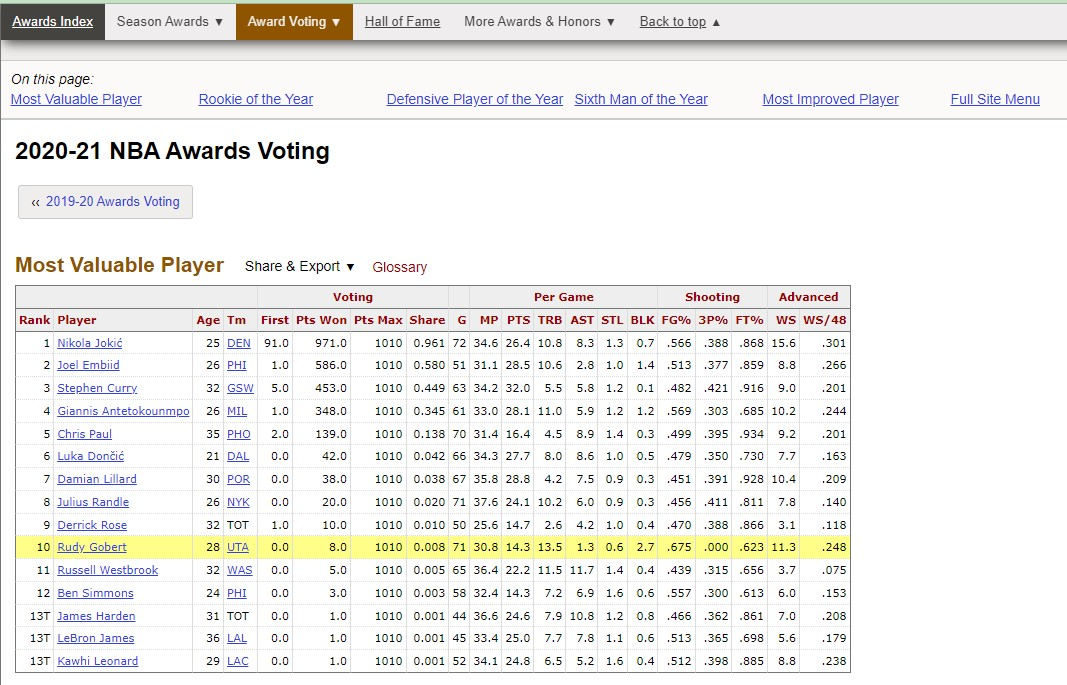

We might use these tables to help predict the Most Valued Player in the National Basketball Association league for 2022.  We would start this process by scraping the data from their website.  

## For reference:
---


This is the code used to scrape the tables from the website, using Colabs, and saving them in .csv files, downloaded to the local device.  They have been uploaded to Github so that you don't need to get them again.  The code below is included for reference.
```
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

def get_data():
  years = list(range(1991, 2021))
  url = "https://www.basketball-reference.com/awards/awards_{}.html"
  for year in years:
    year_url = url.format(year)
    data = requests.get(year_url)
    soup = BeautifulSoup(data.text, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp_year = pd.read_html(str(mvp_table))[0]
    filename = "mvp_{}.csv"
    mvp_year.to_csv(filename.format(year))
    files.download(filename.format(year))
  return mvp_year

table_data = get_data()
```





##Data sources:
---


The downloaded files were then uploaded to Github and are stored in this folder: https://github.com/futureCodersSE/python-programming-for-data/tree/main/Datasets/NBA-MVP.  Links to individual files are https://github.com/futureCodersSE/python-programming-for-data/blob/main/Datasets/NBA-MVP/mvp_1991.csv with the year replaced each time.

## Activity
---

Read the datasets (there are 11 dataset files - 1991 to 2021 - how can you use a loop to do this?)

Investigate the contents of the resulting dataframes.  

Can they be sensibly merged?  What do you observe?

Does sorting revealt any trends?

Is there a trend in performance (



Task 1: Using a for loop get data for each year from 1991 to 2021 and save them in one dictionary together. So I can access them when I need to merge them.

In [6]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_data(url):
  data = requests.get(url)
  soup = BeautifulSoup(data.text, "html.parser")
  soup.find('tr', class_="over_header").decompose()
  mvp_table = soup.find(id="mvp")
  mvp_df = pd.read_html(str(mvp_table))[0]  #TypeError: 'str' object is not callable !!!
  return mvp_df

#def get_dataframe(url):  # function to read csv files from url
#  df  = pd.read_csv(url,index_col=False)
#  return df

#Using a for loop read all the csv files and save the dataframes in one dictionary
url_str2 = "https://www.basketball-reference.com/awards/awards_"
#url_str1 = "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_"
df ={}
for i in range(1991,2022):
  url = url_str2+str(i)+".html"
  # print(url)
  df[i] = get_data(url)



All the dataframes from 1991 to 2021 are now saved in the dictionary df.

Task 2: Next I will take a look their columns and shapes and see if I can merge them in a sensible way.

In [7]:
#Let's take a look at the dataframes to see what columns to merge with.

for i in range(1991,2022):
  print(df[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     20 non-null     object 
 1   Player   20 non-null     object 
 2   Age      20 non-null     int64  
 3   Tm       20 non-null     object 
 4   First    20 non-null     float64
 5   Pts Won  20 non-null     float64
 6   Pts Max  20 non-null     int64  
 7   Share    20 non-null     float64
 8   G        20 non-null     int64  
 9   MP       20 non-null     float64
 10  PTS      20 non-null     float64
 11  TRB      20 non-null     float64
 12  AST      20 non-null     float64
 13  STL      20 non-null     float64
 14  BLK      20 non-null     float64
 15  FG%      20 non-null     float64
 16  3P%      20 non-null     float64
 17  FT%      20 non-null     float64
 18  WS       20 non-null     float64
 19  WS/48    20 non-null     float64
dtypes: float64(14), int64(3), object(3)
memory usage: 3.2+ K

The columns in all the dataframes have the same headings and are the same in number. Only thing is it looks like some of them may have non-null values. But that will be dealt with when cleaning up the data. For now, let's look at how best to merge them.

In [8]:
new_df = df[1991]
for i in range(1992,2022):
  df_add = df[i]
  new_df = pd.concat([new_df,df_add])

Let's see if the data are all merged and put together. The total number of rows should be 448, the first and last players' names are Jokić (from 1991 data) Leonard (from 2021 data) respectively.

In [9]:
print(new_df.info())
print(new_df.head())
print(new_df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 14
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     474 non-null    object 
 1   Player   474 non-null    object 
 2   Age      474 non-null    int64  
 3   Tm       474 non-null    object 
 4   First    474 non-null    float64
 5   Pts Won  474 non-null    float64
 6   Pts Max  474 non-null    int64  
 7   Share    474 non-null    float64
 8   G        474 non-null    int64  
 9   MP       474 non-null    float64
 10  PTS      474 non-null    float64
 11  TRB      474 non-null    float64
 12  AST      474 non-null    float64
 13  STL      474 non-null    float64
 14  BLK      474 non-null    float64
 15  FG%      474 non-null    float64
 16  3P%      463 non-null    float64
 17  FT%      474 non-null    float64
 18  WS       474 non-null    float64
 19  WS/48    474 non-null    float64
dtypes: float64(14), int64(3), object(3)
memory usage: 77.8+

The dataframes seem to be appended together well. Keeping all columns will lead to overfitting data. Choosing only the relevant features would help reduce noise and lead to better understanding of the trends. Better to get information we need to know what columns have more relavance/weight in predicting MVP based on further understanding. I am looking into it now and came up with something called Mutual Information scores. So let me understand that first and then get back here with relavant columns to look into.

Looks like voting (win shares) and ranking are more important than defensive plays such as blocking, stealing etc. So I am going to be looking into sorting by winshare in 48 minutes(WS/48) and matches played (the more they play more likely to be a valued player) and points they scored (better to use their share of points scored in the total). We will then look into top 10 players from 1981 to 2021.

In [10]:
new_df_sort = new_df.sort_values(by=['WS/48', 'Share', 'MP'])
print(new_df_sort.head(10))

   Rank             Player  Age   Tm  First  ...    FG%    3P%    FT%   WS  WS/48
17  17T      Allen Iverson   21  PHI    0.0  ...  0.416  0.341  0.702  4.1  0.065
12   13         Jason Kidd   21  DAL    0.0  ...  0.385  0.272  0.698  3.7  0.066
11   12     Antoine Walker   21  BOS    0.0  ...  0.423  0.312  0.645  4.7  0.070
15   16       Bernard King   34  WSB    0.0  ...  0.472  0.216  0.790  3.5  0.070
10   11  Russell Westbrook   32  WAS    0.0  ...  0.439  0.315  0.656  3.7  0.075
12   13     Michael Jordan   38  WAS    0.0  ...  0.416  0.189  0.790  3.3  0.075
13  12T    Stephen Jackson   31  TOT    0.0  ...  0.423  0.328  0.779  5.0  0.077
8     9       LeBron James   19  CLE    0.0  ...  0.417  0.290  0.754  5.1  0.078
13  14T    Carmelo Anthony   19  DEN    0.0  ...  0.426  0.322  0.777  6.1  0.098
12   13       Isiah Thomas   29  DET    0.0  ...  0.435  0.292  0.782  3.4  0.098

[10 rows x 20 columns]


Before proceeding any further, since I am only interested in looking at MVP trends, I want to actually do a different way of concatanating the dataframes. So let's redo the concatanation with this new knowledge of relavant columns - Year (so I can look at trends), player, Share (I don't need points and max points since Share = points/max points) and win share (WS/48).

In [84]:
#MVP dataframes concatatnated together with just relavant columns only
MVP_df = df[1991]
MVP_df["Year"] = 1991
for i in range(1992,2022):
  df_add = df[i]
  df_add["Year"] =i
  MVP_df = pd.concat([MVP_df,df_add])

#MVP_df["Year"] = pd.to_datetime(MVP_df.Year, format='%Y')

print(MVP_df.head())
print(MVP_df.tail())
print(MVP_df.info())

  Rank           Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48  Year
0    1   Michael Jordan   27  CHI   77.0  ...  0.312  0.851  20.3  0.321  1991
1    2    Magic Johnson   31  LAL   10.0  ...  0.320  0.906  15.4  0.251  1991
2    3   David Robinson   25  SAS    6.0  ...  0.143  0.762  17.0  0.264  1991
3    4  Charles Barkley   27  PHI    2.0  ...  0.284  0.722  13.4  0.258  1991
4    5      Karl Malone   27  UTA    0.0  ...  0.286  0.770  15.5  0.225  1991

[5 rows x 21 columns]
   Rank             Player  Age   Tm  First  ...    3P%    FT%   WS  WS/48  Year
10   11  Russell Westbrook   32  WAS    0.0  ...  0.315  0.656  3.7  0.075  2021
11   12        Ben Simmons   24  PHI    0.0  ...  0.300  0.613  6.0  0.153  2021
12  13T       James Harden   31  TOT    0.0  ...  0.362  0.861  7.0  0.208  2021
13  13T       LeBron James   36  LAL    0.0  ...  0.365  0.698  5.6  0.179  2021
14  13T      Kawhi Leonard   29  LAC    0.0  ...  0.398  0.885  8.8  0.238  2021

[5 rows x 21 col

Looks good and now we have the Year in a separate column. Let's see what we get when we sort the data based on columns Share and WS/48. I think an MVP will have do well in both points share and win points share. 

In [85]:
MVP_sort_v2 = MVP_df.sort_values(by=['WS/48', 'Share'])
print(MVP_sort_v2.head(10))
print(MVP_sort_v2.tail(10))

   Rank             Player  Age   Tm  First  ...    3P%    FT%   WS  WS/48  Year
17  17T      Allen Iverson   21  PHI    0.0  ...  0.341  0.702  4.1  0.065  1997
12   13         Jason Kidd   21  DAL    0.0  ...  0.272  0.698  3.7  0.066  1995
11   12     Antoine Walker   21  BOS    0.0  ...  0.312  0.645  4.7  0.070  1998
15   16       Bernard King   34  WSB    0.0  ...  0.216  0.790  3.5  0.070  1991
10   11  Russell Westbrook   32  WAS    0.0  ...  0.315  0.656  3.7  0.075  2021
12   13     Michael Jordan   38  WAS    0.0  ...  0.189  0.790  3.3  0.075  2002
13  12T    Stephen Jackson   31  TOT    0.0  ...  0.328  0.779  5.0  0.077  2010
8     9       LeBron James   19  CLE    0.0  ...  0.290  0.754  5.1  0.078  2004
13  14T    Carmelo Anthony   19  DEN    0.0  ...  0.322  0.777  6.1  0.098  2004
12   13       Isiah Thomas   29  DET    0.0  ...  0.292  0.782  3.4  0.098  1991

[10 rows x 21 columns]
  Rank          Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48  Year
0    1 

Let's specifically look at the columns of share and WS/48 for the top 5 and last 5 players.

In [86]:
print(MVP_sort_v2[["Player","Share","WS/48", "Year"]])

               Player  Share  WS/48  Year
17      Allen Iverson  0.001  0.065  1997
12         Jason Kidd  0.007  0.066  1995
11     Antoine Walker  0.005  0.070  1998
15       Bernard King  0.007  0.070  1991
10  Russell Westbrook  0.005  0.075  2021
..                ...    ...    ...   ...
0      Michael Jordan  0.986  0.317  1996
0        LeBron James  0.969  0.318  2009
0       Stephen Curry  1.000  0.318  2016
0      Michael Jordan  0.928  0.321  1991
0        LeBron James  0.998  0.322  2013

[474 rows x 4 columns]


In [87]:
MVP_df_v2 = MVP_df.drop(columns=["Rank","Age","Tm","First","Pts Won","Pts Max","G","MP","PTS","TRB","AST","STL","BLK","FG%","3P%","FT%","WS"])
#MVP_df_v2 = MVP_df_v2.drop(columns=1)
print(MVP_df_v2.head())
print(MVP_df_v2.tail())

            Player  Share  WS/48  Year
0   Michael Jordan  0.928  0.321  1991
1    Magic Johnson  0.518  0.251  1991
2   David Robinson  0.496  0.264  1991
3  Charles Barkley  0.231  0.258  1991
4      Karl Malone  0.148  0.225  1991
               Player  Share  WS/48  Year
10  Russell Westbrook  0.005  0.075  2021
11        Ben Simmons  0.003  0.153  2021
12       James Harden  0.001  0.208  2021
13       LeBron James  0.001  0.179  2021
14      Kawhi Leonard  0.001  0.238  2021


To look at performance trend, I would like to look at the players performacces by year based on 2 columns (makes it simpler to look at trends with less variables) - winshare in 48 minutes and Share. Let's look at time series plot and see what the data looks like.

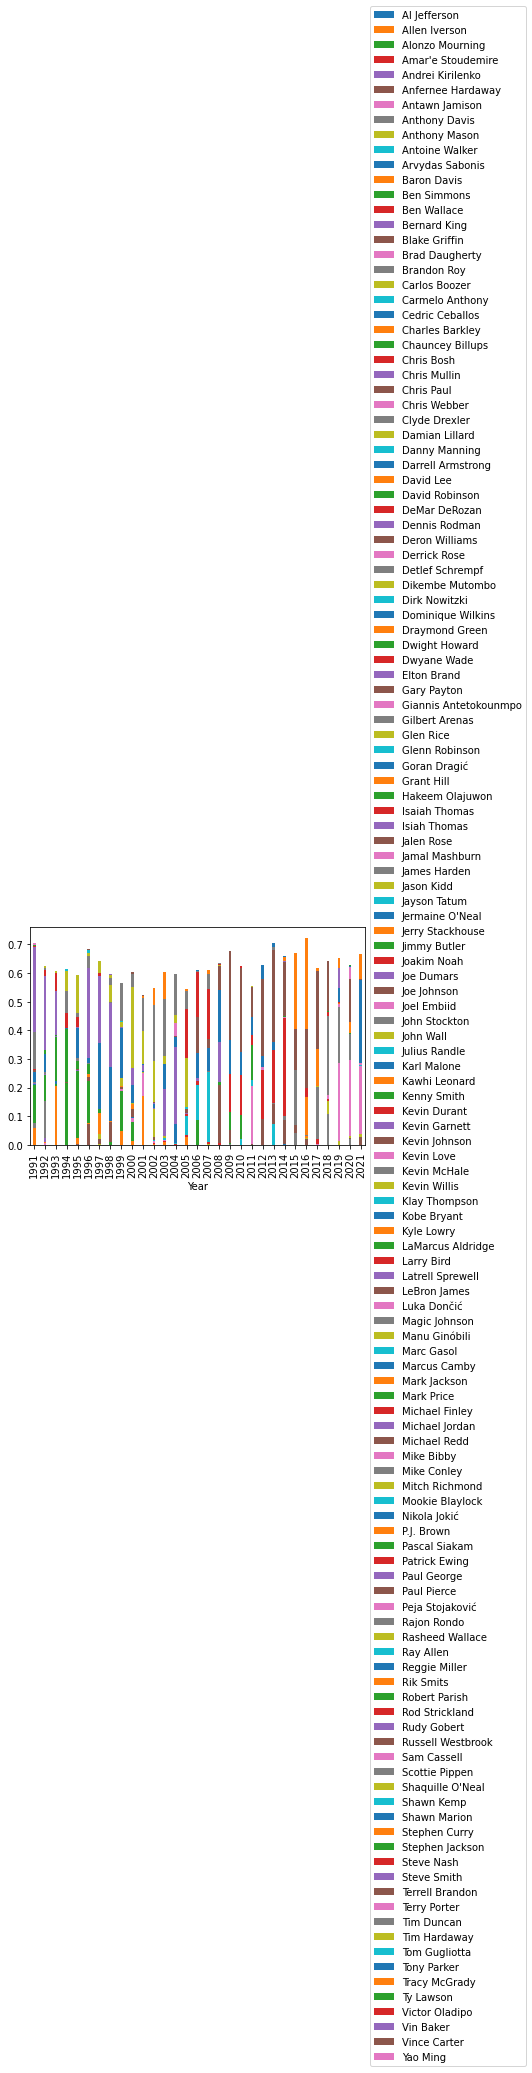

In [89]:
# I want to have some visulaisations tools. So let's install some packages

import matplotlib  
import matplotlib.pyplot as plt
MVP_v2_sort = MVP_df_v2.sort_values(by=['WS/48', 'Share'])
MVP_v2_sort["share_gauge"] = MVP_v2_sort["Share"]*MVP_v2_sort["WS/48"]
MVP_sort_WS = MVP_v2_sort.pivot(index="Year", columns="Player", values = "share_gauge") 
MVP_sort_WS.plot(kind='bar', stacked=True, width=0.25, align='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Reference
---
**Video link**: https://www.youtube.com/watch?v=JGQGd-oa0l4 used as an initial inspiration and modified to allow use of Google Colab and slower progress towards predictions (video uses Jupyter notebooks and local files so code is different)

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: